# C10.3 Maximum Likelihood Analysis
2022/3/15

Experenter: 黄子维 20980066

huangzw29@mail2.sysu.edu.cn

206A06

Env: python 3.9.7 

**Reproduction guide:**
- To promise the repeatability, all simulation data have been stored in '.npz' format in different Folders.
- To reproduce the result, 
  - **DO NOT** run those code enclosed by "## Not run".
  - Modify the directory properly in every `os.chdir()`commands according to the file path on your PC(Use **absolute path**)
  - In section "1.3 Load the data", you can change the index to load different data in different subfolders, and run the code below that section **on one click**.

**Summary of the confidence interval**

| Item              | Central | +      | -      |
| ----------------- | ------- | ------ | ------ |
| Data_1-A events   | 92.84   | +12.63 | -11.89 |
| Data_1-B events   | 207.16  | +16.65 | -15.88 |
| Data_2_1-A events | 139.90  | +14.98 | -14.26 |
| Data_2_1-B events | 210.10  | +17.25 | -16.45 |
| Data_2_2-A events | 205.62  | +16.79 | -16.11 |
| Data_2_2-B events | 194.38  | +16.51 | -15.70 |
| Data_2_3-A events | 249.20  | +18.62 | -17.92 |
| Data_2_3-B events | 200.80  | +17.31 | -16.48 |
| Data_2_4-A events | 310.35  | +20.18 | -19.49 |
| Data_2_4-B events | 189.65  | +16.93 | -16.09 |
| Data_3_1-A events | 43.88   | +8.90  | -8.17  |
| Data_3_1-B events | 106.12  | +12.01 | -11.23 |
| Data_3_2-A events | 78.33   | +11.44 | -10.71 |
| Data_3_2-B events | 146.67  | +14.21 | -13.43 |
| Data_3_3-A events | 124.16  | +14.62 | -13.88 |
| Data_3_3-B events | 250.84  | +18.55 | -17.77 |
| Data_3_4-A events | 161.35  | +16.35 | -15.62 |
| Data_3_4-B events | 288.65  | +19.96 | -19.17 |


In [1]:
import numpy as np 
import pandas as pd
from scipy.stats import poisson  
import scipy.optimize as opt 
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [10,7]
# xtick
matplotlib.rcParams['xtick.top'] = True
matplotlib.rcParams ['xtick.direction'] = 'in'
matplotlib.rcParams['xtick.minor.visible'] = True
# ytick
matplotlib.rcParams['ytick.right'] = True
matplotlib.rcParams['ytick.direction'] = 'in'
matplotlib.rcParams['ytick.minor.visible'] = True
# font
matplotlib.rcParams['font.size'] = 19
matplotlib.rcParams['font.family']= 'DejaVu Serif'
matplotlib.rcParams['mathtext.default'] = 'regular'
# figure
matplotlib.rcParams['errorbar.capsize'] = 3
matplotlib.rcParams['figure.facecolor'] = (1,1,1)

## 1. Simulation Data 


### 1.1 Definition of Event A and B

In [3]:
# Sampling intervals
binning = np.linspace(0,25,40) 

# Definition of Event A and B
def class_a(nev):
    return np.random.normal(10, 2, size=nev)
def class_b(nev):
    return np.random.normal(15, 3, size=nev)

In [3]:
## Not run
# os.chdir('C:/Users/12977/Desktop/Workspace/04-SYSU/SYSU-PHY-EXP-III/C10-Maximum_likelihood_estimation/C10.3-Maximum_likelihood_estimation/C10.3-Output/')
# os.getcwd()
# mc_class_a = class_a(10000)
# mc_class_b = class_b(10000)
# np.savez("mc_class", mc_class_a, mc_class_b)
## End not run

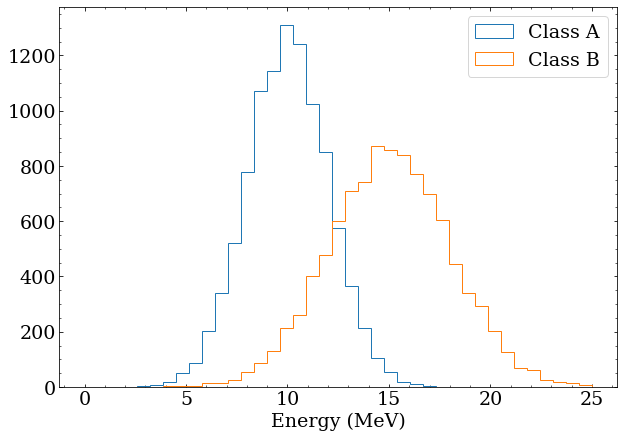

In [3]:
os.chdir('C:/Users/12977/Desktop/Workspace/04-SYSU/SYSU-PHY-EXP-III/C10-Maximum_likelihood_estimation/C10.3-Maximum_likelihood_estimation/C10.3-Output/')
os.getcwd()
data = np.load("mc_class.npz")
mc_class_a = data['arr_0']
mc_class_b = data['arr_1']

# Check for normality
plt.hist(mc_class_a, bins=binning, histtype='step', label='Class A')
plt.hist(mc_class_b, bins=binning, histtype='step', label='Class B')
plt.xlabel('Energy (MeV)')
plt.legend()

plt.savefig(r'Fig.0.png', bbox_inches = 'tight', dpi=300)

### 1.2 Generate the simulation data

#### 1.2.1 Data_1: 100 Class A + 200 Calass B

In [40]:
# # Not run
# os.chdir('C:/Users/12977/Desktop/Workspace/04-SYSU/SYSU-PHY-EXP-III/C10-Maximum_likelihood_estimation/C10.3-Maximum_likelihood_estimation/C10.3-Output/Data_1/')
# os.getcwd()
# data = np.concatenate([class_a(100), class_b(200)])
# np.savez("Data", data)
# # End NOT run

#### 1.2.2 Change the proportion

##### 1.2.2.1 Data_2_1: 150 Class A + 200 Calass B

In [103]:
# # Not run
# os.chdir('C:/Users/12977/Desktop/Workspace/04-SYSU/SYSU-PHY-EXP-III/C10-Maximum_likelihood_estimation/C10.3-Maximum_likelihood_estimation/C10.3-Output/Data_2_1/')
# os.getcwd()
# data = np.concatenate([class_a(150), class_b(200)])
# np.savez("Data", data)
# # End NOT run

##### 1.2.2.2 Data_2_2: 200 Class A + 200 Calass B

In [104]:
# # Not run
# os.chdir('C:/Users/12977/Desktop/Workspace/04-SYSU/SYSU-PHY-EXP-III/C10-Maximum_likelihood_estimation/C10.3-Maximum_likelihood_estimation/C10.3-Output/Data_2_2/')
# os.getcwd()
# data = np.concatenate([class_a(200), class_b(200)])
# np.savez("Data", data)
# # End NOT run

##### 1.2.2.3 Data_2_3: 250 Class A + 200 Calass B

In [120]:
# # Not run
# os.chdir('C:/Users/12977/Desktop/Workspace/04-SYSU/SYSU-PHY-EXP-III/C10-Maximum_likelihood_estimation/C10.3-Maximum_likelihood_estimation/C10.3-Output/Data_2_3/')
# os.getcwd()
# data = np.concatenate([class_a(250), class_b(200)])
# np.savez("Data", data)
# # End NOT run

##### 1.2.2.4 Data_2_4: 300 Class A + 200 Calass B

In [134]:
# # Not run
# os.chdir('C:/Users/12977/Desktop/Workspace/04-SYSU/SYSU-PHY-EXP-III/C10-Maximum_likelihood_estimation/C10.3-Maximum_likelihood_estimation/C10.3-Output/Data_2_4/')
# os.getcwd()
# data = np.concatenate([class_a(300), class_b(200)])
# np.savez("Data", data)
# # End NOT run

#### 1.2.3 Change the amount

##### 1.2.3.1 Data_3_1: 50 Class A + 100 Calass B

In [159]:
# # Not run
# os.chdir('C:/Users/12977/Desktop/Workspace/04-SYSU/SYSU-PHY-EXP-III/C10-Maximum_likelihood_estimation/C10.3-Maximum_likelihood_estimation/C10.3-Output/Data_3_1/')
# os.getcwd()
# data = np.concatenate([class_a(50), class_b(100)])
# np.savez("Data", data)
# # End NOT run

##### 1.2.3.2 Data_3_2: 75 Class A + 150 Calass B

In [171]:
# # Not run
# os.chdir('C:/Users/12977/Desktop/Workspace/04-SYSU/SYSU-PHY-EXP-III/C10-Maximum_likelihood_estimation/C10.3-Maximum_likelihood_estimation/C10.3-Output/Data_3_2/')
# os.getcwd()
# data = np.concatenate([class_a(75), class_b(150)])
# np.savez("Data", data)
# # End NOT run

##### 1.2.3.3 Data_3_3: 125 Class A + 250 Calass B

In [182]:
# # Not run
# os.chdir('C:/Users/12977/Desktop/Workspace/04-SYSU/SYSU-PHY-EXP-III/C10-Maximum_likelihood_estimation/C10.3-Maximum_likelihood_estimation/C10.3-Output/Data_3_3/')
# os.getcwd()
# data = np.concatenate([class_a(125), class_b(250)])
# np.savez("Data", data)
# # End NOT run

##### 1.2.3.4 Data_3_4: 150 Class A + 300 Calass B

In [192]:
# # Not run
# os.chdir('C:/Users/12977/Desktop/Workspace/04-SYSU/SYSU-PHY-EXP-III/C10-Linux_Python/C10.3-Maximum_likelihood_estimation/C10.3-Output/Data_3_4/')
# os.getcwd()
# data = np.concatenate([class_a(150), class_b(300)])
# np.savez("Data", data)
# # End NOT run

### 1.3 Load the data

[ 9.87861896 11.32553474 10.25185884  8.8414772   6.10286581  3.04527301
 11.83900474  5.45479637 10.64775398 10.90131631  7.81453945  8.9169888
 10.62147749  8.06356171  9.69950131  8.16497585  9.24240032 12.29395713
  8.49384185 10.12408282  7.32690786  9.96400277 12.11144512  9.94620876
 11.06532614  7.78464741 12.84954265  9.96877127 10.5237891   9.47910815
  8.85987677  8.909246   13.21163391  8.87634415 10.16085358 11.7803945
  8.75672982 10.48564528  9.11415112  9.87204437  9.77094848 13.59434808
  5.01085901 11.2549929   7.0715877   9.94000007  8.26402914 12.99673781
 12.87628465  9.63464977 13.41877279 10.91723061  6.43743687  7.07585481
 13.16089933 11.20099207  8.86522744  9.31701517 10.64426781  5.7049873
  9.35603656 12.19672284 10.63042844  8.67924854  9.53697328 10.45551281
 11.55399289 15.0710122   9.86172776  8.68815184 11.24542947 12.13409254
  7.76519858  7.97014805  9.58704353 11.55356689  7.80732073 10.35614502
 10.13244608 11.2576243  12.54000563 12.55413359  8.05

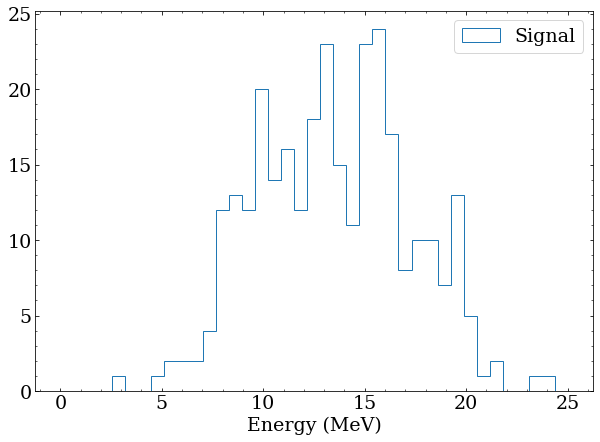

In [4]:
Data_Folder_list = ["Data_1", "Data_2_1", "Data_2_2", "Data_2_3", "Data_2_4", "Data_3_1", "Data_3_2", "Data_3_3", "Data_3_4"]
Data_Folder = Data_Folder_list[0] # Change the index to load different data
os.chdir('C:/Users/12977/Desktop/Workspace/04-SYSU/SYSU-PHY-EXP-III/C10-Maximum_likelihood_estimation/C10.3-Maximum_likelihood_estimation/C10.3-Output/'+Data_Folder+'/')
os.getcwd()
data = np.load("Data.npz")
data = data['arr_0']
print(data)
# Check for normality
plt.hist(data, bins=binning, histtype='step', label='Signal')
plt.xlabel('Energy (MeV)')
plt.legend()
plt.savefig(r'Fig.1.1.png', bbox_inches = 'tight', dpi=300)

In [5]:
np.savetxt("data.csv", data, fmt="%f", delimiter = ",")

## 2. Maximum Likelihood Analysis

### 2.1. Definition of the Likelihood function

In [310]:
class LikelihoodFunction:
    def __init__(self, data, event_classes, binning):
        '''Initialization
        data：Input data,
        event_classes: Candidate event classes,
        binning：Sampling intervals.
        '''
        self.data_counts = np.histogram(data, bins=binning)[0] 
        self.class_pdfs = []
        for event_class in event_classes:
            pdf_counts = np.histogram(event_class, bins=binning)[0]
            pdf_norm = pdf_counts/np.sum(pdf_counts) # Normalize PDF
            self.class_pdfs.append(pdf_norm)
        
    def __call__(self, *params):
        '''Calculate the Likelihood 
        *params: use parameters defined above
        '''
        observed = self.data_counts
        expecteds = [scale*pdf for scale,pdf in zip(params,self.class_pdfs)]
        expected = np.sum(expecteds,axis=0)
        
        ## Not run
        # # Approach 1: Use poisson distribution
        # bin_probabilities = poisson.pmf(observed,expected)
        # return np.prod(bin_probabilities)
        # # End Approach 1 
        ## End Not run
        
        ## Approach 2: Use logL
        mask = expected > 0
        bin_nlls = expected[mask]-observed[mask]*np.log(expected[mask])
        return np.sum(bin_nlls)
        ## End Approach 2

### 2.2. Calculation

In [311]:
# Generate the Likelihood Function
L_func = LikelihoodFunction(data, [mc_class_a, mc_class_b], binning)

# Caculate the Maximum likelihood parameters nll_result
nll_result = opt.minimize(lambda x: L_func(*x), x0=(50,50), method='Nelder-Mead')
print(nll_result)

with open('Result.txt', 'w') as f:
    print(nll_result, file=f)
    f.write('\n')
    f.close

 final_simplex: (array([[ 92.83670066, 207.16332452],
       [ 92.83666195, 207.16328507],
       [ 92.83662067, 207.16339338]]), array([-460.97717932, -460.97717932, -460.97717932]))
           fun: -460.9771793225278
       message: 'Optimization terminated successfully.'
          nfev: 102
           nit: 51
        status: 0
       success: True
             x: array([ 92.83670066, 207.16332452])


### 2.3. Verify the result in the Likelihood function space

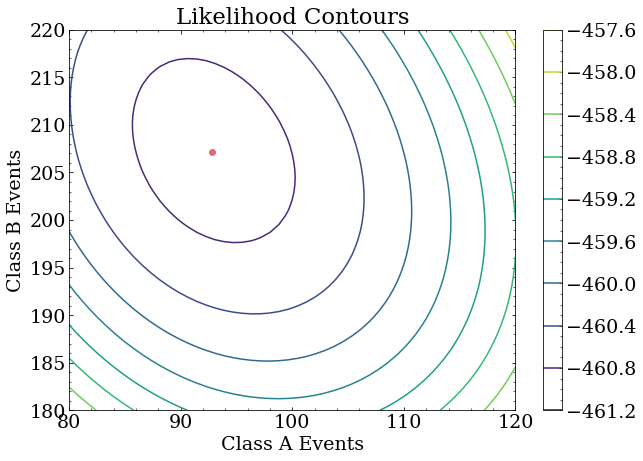

In [312]:
# Generate the Likelihood Contours
X,Y = np.meshgrid(np.linspace(80,120),np.linspace(180,220))

Z = [L_func(x,y) for x,y in zip(X.flatten(), Y.flatten())]
Z = np.asarray(Z).reshape(X.shape)

plt.contour(X,Y,Z)
plt.colorbar()
plt.title('Likelihood Contours')
plt.xlabel('Class A Events')
plt.ylabel('Class B Events')

# The result should appear at the center
plt.scatter(nll_result.x[0], nll_result.x[1], color = "#e06c75")
plt.savefig(r'Fig.1.2.png', bbox_inches = 'tight', dpi=300)

## 3. Confidence interval

### 3.1 Define the profile function

In [313]:
# Use -logL
def profile_class_a(nev):
    '''b remain constant, deviation of the minimum
    '''
    return opt.minimize(lambda x: L_func(nev,x[0]),x0=(50,),method='Nelder-Mead').fun - nll_result.fun

def profile_class_b(nev):
    '''a remain constant, deviation of the minimum
    '''
    return opt.minimize(lambda x: L_func(x[0],nev),x0=(50,),method='Nelder-Mead').fun - nll_result.fun


### 3.2 Calculate the confidence interval

In [315]:
def confidence_interval(delta_nll_fn,central,step):
    '''
    confidence level = 1 sigma
    '''
    lo = opt.brentq(lambda x: delta_nll_fn(x)-0.5, central-step, central)
    hi = opt.brentq(lambda x: delta_nll_fn(x)-0.5, central, central+step)
    return lo,hi

# # Confidence interval of event A
# central = nll_result.x[0]
# lo,hi = confidence_interval(profile_class_a, central, 50)
# print('Number of A events = $%0.2f^{+%0.2f}_{-%0.2f}$'%(central, hi-central, central-lo))
# # Confidence interval of event B
# central = nll_result.x[1]
# lo,hi = confidence_interval(profile_class_b, central, 50)
# print('Number of B events = $%0.2f^{+%0.2f}_{-%0.2f}$'%(central,hi-central,central-lo))

with open('Result.txt', 'a') as f:
    central = nll_result.x[0]
    lo,hi = confidence_interval(profile_class_a, central, 50)
    print('Number of A events = $%0.2f^{+%0.2f}_{-%0.2f}$'%(central,hi-central,central-lo), file=f)
    
    central = nll_result.x[1]
    lo,hi = confidence_interval(profile_class_b, central, 50)
    print('Number of B events = $%0.2f^{+%0.2f}_{-%0.2f}$'%(central,hi-central,central-lo), file=f)
    f.write('\n')
    f.close

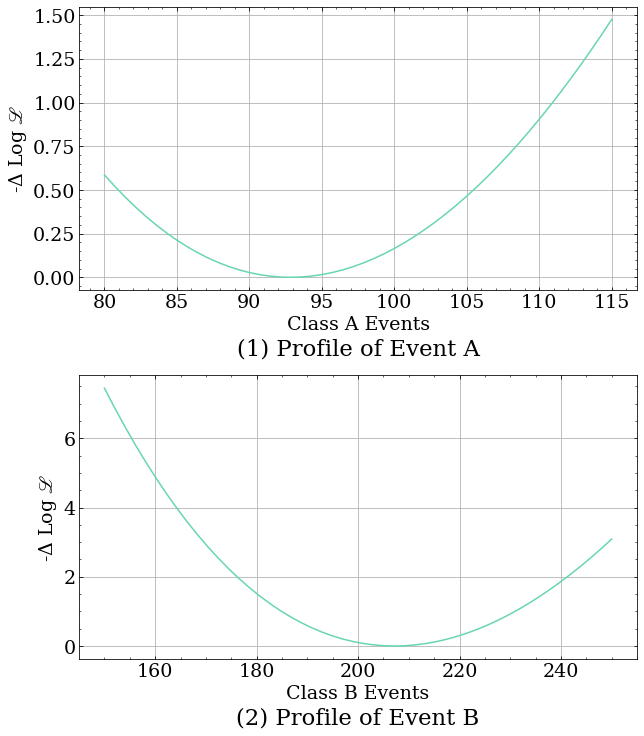

In [314]:
fig, ax =  plt.subplots(2, 1, figsize=(10, 12))

# profile_class_a
x = np.linspace(80,115,50)
y = [profile_class_a(nev) for nev in x]
ax[0].plot(x, y, color="#67D5B5")
ax[0].set_xlabel('Class A Events')
ax[0].set_ylabel('-$\Delta$ Log ${\scr L}$')
ax[0].set_title('(1) Profile of Event A', y=-0.25)
ax[0].grid()

# profile_class_b
x = np.linspace(150,250,50)
y = [profile_class_b(nev) for nev in x]
ax[1].plot(x, y, color="#67D5B5")
ax[1].set_xlabel('Class B Events')
ax[1].set_ylabel('-$\Delta$ Log ${\scr L}$')
ax[1].set_title('(2) Profile of Event B', y=-0.25)
ax[1].grid()

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.3)

plt.savefig('Fig.1.3.png', bbox_inches='tight', dpi=300)

In [316]:
with open('C:/Users/12977/Desktop/Workspace/04-SYSU/SYSU-PHY-EXP-III/C10-Maximum_likelihood_estimation/C10.3-Maximum_likelihood_estimation/C10.3-Output/Confidence interval.txt', 'a') as f:
    central = nll_result.x[0]
    lo,hi = confidence_interval(profile_class_a, central, 50)
    print('| '+Data_Folder+'-A events | %0.2f | +%0.2f | -%0.2f |'%(central,hi-central,central-lo), file=f)
    
    central = nll_result.x[1]
    lo,hi = confidence_interval(profile_class_b, central, 50)
    print('| '+Data_Folder+'-B events | %0.2f | +%0.2f | -%0.2f |'%(central,hi-central,central-lo), file=f)
    f.close

## 4. Output

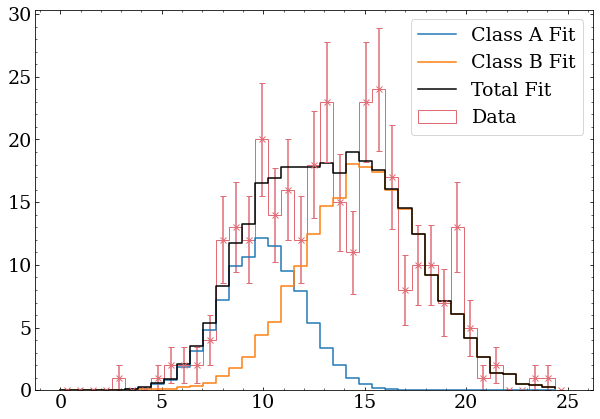

In [317]:
# Event A and B
expecteds = [scale*pdf for scale, pdf in zip(nll_result.x, L_func.class_pdfs)]
for class_name, expected_class in zip(['A','B'], expecteds):    
    plt.plot(binning[:-1], 
            expected_class, 
            drawstyle='steps-post', 
            label='Class %s Fit'%class_name)

# Mix A and B
expected = np.sum(expecteds, axis=0)
plt.plot(binning[:-1], expected, 
            drawstyle='steps-post', 
            color='k', label='Total Fit')

# Origin signal and error bars
bin_centers = (binning[:-1] + binning[1:])/2
plt.hist(data, bins=binning, 
        histtype='step', 
        label='Data', 
        color = '#e06c75')

plt.legend()       
plt.errorbar(bin_centers, L_func.data_counts, 
            yerr=np.sqrt(L_func.data_counts), 
            marker='x', 
            label='Original Signal', 
            linestyle='none', color = '#e06c75',)

plt.savefig(r'Fig.1.4.png', bbox_inches = 'tight', dpi=300)

## 5. Confidence interval change

0.06874782074931866 18.853172439209477 0.994042688610694


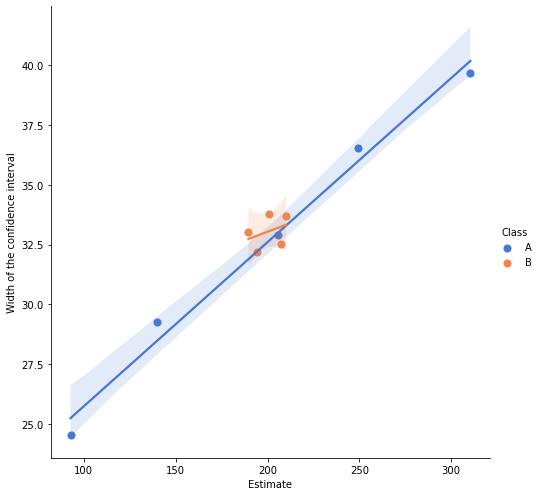

In [12]:
df1 = pd.read_csv("Confidence2.tsv", sep="\s+")
df1["Width of the confidence interval"] = (df1["+"]-df1["-"])
df1

sns.lmplot(x="Estimate", y="Width of the confidence interval", data = df1, hue="Class",
           palette="muted", height=7,
           scatter_kws={"s": 50, "alpha": 1})

plt.savefig(r'C10.3-Output/Confidence_interval/Fig.2.1.png', bbox_inches = 'tight', dpi=300)

df1_a = df1[df1["Class"] == "A"]
f_func = np.polyfit(df1_a["Estimate"], df1_a["Width of the confidence interval"], deg=1)
x_dns = np.linspace(0, 100, 500)
y_reg = np.polyval(f_func, x_dns)
r = np.corrcoef(df1_a["Estimate"], df1_a["Width of the confidence interval"])[0,1]
A1, A2 = tuple(f_func)
print(A1, A2 , r)

0.1275273965432711 12.07497727726005 0.994113063938295
0.08623394581768427 14.534869038394735 0.9983750429516549


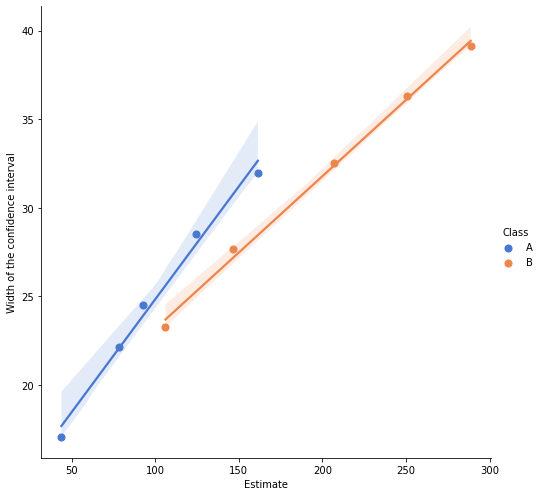

In [14]:
df2 = pd.read_csv("Confidence3.tsv", sep="\s+")
df2["Width of the confidence interval"] = (df2["+"]-df2["-"])
df2
sns.lmplot(x="Estimate", y="Width of the confidence interval", data = df2, hue="Class",
           palette="muted", height=7,
           scatter_kws={"s": 50, "alpha": 1})

plt.savefig(r'C10.3-Output/Confidence_interval/Fig.2.2.png', bbox_inches = 'tight', dpi=300)

df2_a = df2[df2["Class"] == "A"]
f_func = np.polyfit(df2_a["Estimate"], df2_a["Width of the confidence interval"], deg=1)
x_dns = np.linspace(0, 100, 500)
y_reg = np.polyval(f_func, x_dns)
r = np.corrcoef(df2_a["Estimate"], df2_a["Width of the confidence interval"])[0,1]
A1, A2 = tuple(f_func)
print(A1, A2 , r)

df2_b = df2[df2["Class"] == "B"]
f_func = np.polyfit(df2_b["Estimate"], df2_b["Width of the confidence interval"], deg=1)
x_dns = np.linspace(0, 100, 500)
y_reg = np.polyval(f_func, x_dns)
r = np.corrcoef(df2_b["Estimate"], df2_b["Width of the confidence interval"])[0,1]
A1, A2 = tuple(f_func)
print(A1, A2 , r)